# **Implementação - Abastecimento (Carro autonomo)**

A seguir, vamos apresentar a implementação de uma possível funcionalidade de um carro autônomo

Imagine que a implementação controle do tanque de combustível do seu carro. O sistema mantém uma quantidade mínima de combustível e tenta comprar o produto a um baixo custo.

# Importar bibliotecas necessárias para executar o código


In [7]:
from random import *
import matplotlib.pyplot as plt
import numpy as np

# Definição do ambiente

Vamos armazenar no ambiente as seguintes informações: **(completar informação)**

In [4]:

# Definicao da classe ambiente

class Ambiente():

    def __init__(self):
        # Ambiente explorado pelo agente de compra de combustivel
        self.capacidade = 80  # capacidade em litros do tanque do veículo
        self.volume_atual = 30  # Volume atual de combustível no veículo
        self.historico_preco_alcool = [3.7]  # Historico de Preço do Álcool
        self.historico_preco_gasolina = [5.6]  # Histórico de Preço da Gasolina
        self.historico_volume = [self.volume_atual]  # Histórico da Quantidade de Combustível no Veículo
        self.historico_qtde_comprados_gasolina = [0]  # Histórico da Quantidade de Litros de Gasolina Comprados
        self.historico_qtde_comprados_alcool = [0]  # Histórico da Quantidade de Litros de Alcool Comprados

    def percebe_preco_atual_alcool(self):
        return self.historico_preco_alcool[-1]

    def percebe_preco_atual_gasolina(self):
        return self.historico_preco_gasolina[-1]

    def percebe_qtde_combustivel(self):
        return self.historico_volume[-1]

    def media_alcool(self):
        return sum(self.historico_preco_alcool) / len(self.historico_preco_alcool)

    def media_gasolina(self):
        return sum(self.historico_preco_gasolina) / len(self.historico_preco_gasolina)

    def run(self, dic_acoes):
        '''Realizar alteracoes no ambiente:
        '''

        # Consumo realizado (valores gerados aleatoriamente)
        qtde_consumidos = randint(0, 10)  # recebe aleatoriamente valores entre 0 e 10 [start, end] - Intervalo fechado
        volume_atual = self.historico_volume[-1] - qtde_consumidos + dic_acoes["volume"]

        self.historico_volume.append(volume_atual)

        if dic_acoes["combustivel"] == "gasolina":  # comprou gasolina
            self.historico_qtde_comprados_gasolina.append(dic_acoes["volume"])
            self.historico_qtde_comprados_alcool.append(0)

        elif dic_acoes["combustivel"] == "alcool":  # comprou alcool
            self.historico_qtde_comprados_gasolina.append(0)
            self.historico_qtde_comprados_alcool.append(dic_acoes["volume"])
        else:  # Não comprou nada
            self.historico_qtde_comprados_gasolina.append(0)
            self.historico_qtde_comprados_alcool.append(0)

        # Atualizando o preço da gasolina e do alcool no próximo dia
        valor1 = abs(self.percebe_preco_atual_alcool() + uniform(-1,1))  # novo valor do produto. random() gera valores entre [0,1]
        valor2 = abs(self.percebe_preco_atual_gasolina() + uniform(-1, 1))
        self.historico_preco_alcool.append(valor1)
        self.historico_preco_gasolina.append(valor2)


# Definição do agente

O agente vai armazenar informações sobre: **(completar)**

In [5]:

# Definição da classe agente

class Agente():
    def __init__(self, ambiente):
        self.num_dias = 1
        self.ambiente = ambiente
        self.estoque = ambiente.percebe_qtde_combustivel()
        self.total_gasto = 0
        self.preco_atual_alcool = ambiente.percebe_preco_atual_alcool()
        self.preco_atual_gasolina = ambiente.percebe_preco_atual_gasolina()
        self.media_alcool = self.ambiente.media_alcool()
        self.media_gasolina = self.ambiente.media_gasolina()

    def executa_agente(self, qtde_dias=20):
        dic_acoes = dict()
        for i in range(qtde_dias):
            # O agente percebe o estado do ambiente
            self.estoque = self.ambiente.percebe_qtde_combustivel()
            self.preco_atual_alcool = self.ambiente.percebe_preco_atual_alcool()
            self.preco_atual_gasolina = self.ambiente.percebe_preco_atual_gasolina()
            self.media_alcool = self.ambiente.media_alcool()
            self.media_gasolina = self.ambiente.media_gasolina()

            '''
              Controlador do agente:
              - Define a regra para compra de produtos
            '''
            if (self.preco_atual_alcool < 0.9 * self.media_alcool or self.preco_atual_gasolina < 0.9 * self.media_gasolina) and self.estoque < 80:
                dic_acoes["volume"] = self.ambiente.capacidade - self.ambiente.percebe_qtde_combustivel()
                if self.preco_atual_alcool / self.preco_atual_gasolina < 0.7:
                    dic_acoes["combustivel"] = "alcool"
                else:
                    dic_acoes["combustivel"] = "gasolina"

            elif self.estoque < 8:
                dic_acoes["volume"] = 18
                if self.preco_atual_alcool / self.preco_atual_gasolina < 0.7:
                    dic_acoes["combustivel"] = "alcool"

                else:
                    dic_acoes["combustivel"] = "gasolina"
            else:
                dic_acoes["volume"] = 0
                dic_acoes["combustivel"] = ""

            # Fim do controlador

            if dic_acoes["combustivel"] == "gasolina":
                self.total_gasto += self.preco_atual_gasolina * dic_acoes["volume"]
            elif dic_acoes["combustivel"] == "alcool":
                self.total_gasto += self.preco_atual_alcool * dic_acoes["volume"]

            # O agente aplica modificacoes ao ambiente)
            self.ambiente.run(dic_acoes)

            self.num_dias += 1


# Definir classe para impressão dos resultados

A classe deve ser modificada para atender as necessidades do seu sistema.

In [6]:

class Imprime():
    def imprime_resultado(self, agente):
        historico_dias = np.linspace(0, agente.num_dias, agente.num_dias)

        # Primeira impressão: historico do preco gasolina
        plt.plot(historico_dias, agente.ambiente.historico_preco_gasolina, 'bo--', label='Historico Gasolina(preço)')
        plt.legend()
        plt.show()

        # Segunda impressão: historico do preco alcool
        plt.plot(historico_dias, agente.ambiente.historico_preco_alcool, 'bo--',
                     label='Historico Alcool(preço)')
        plt.legend()
        plt.show()

        # Terceira impressão: historico qtde de gasolina comprada
        fig, ax = plt.subplots()
        ax.vlines(historico_dias, ymin=0, ymax=agente.ambiente.historico_qtde_comprados_gasolina)
        ax.plot(historico_dias, agente.ambiente.historico_qtde_comprados_gasolina, "o", color='green')
        ax.set_ylim(0, 100)
        plt.show()

        # Quarta impressão: historico qtde de alcool comprada
        fig, ax = plt.subplots()
        ax.vlines(historico_dias, ymin=0, ymax=agente.ambiente.historico_qtde_comprados_alcool)
        ax.plot(historico_dias, agente.ambiente.historico_qtde_comprados_alcool, "o", color='green')
        ax.set_ylim(0, 100)
        plt.show()

        # Quinta impressão: historico do volume
        plt.plot(historico_dias, agente.ambiente.historico_volume, 'rD--', label='Historico Volume (estoque)')
        plt.legend()
        plt.show()

# Execução do programa

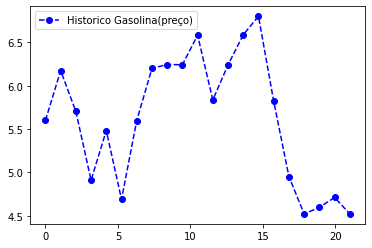

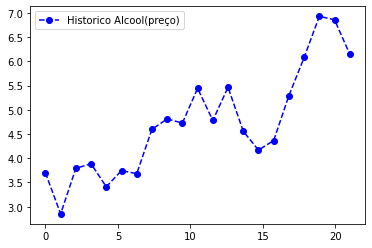

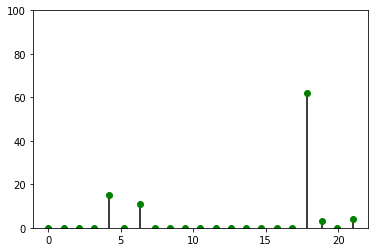

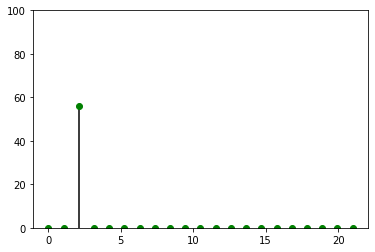

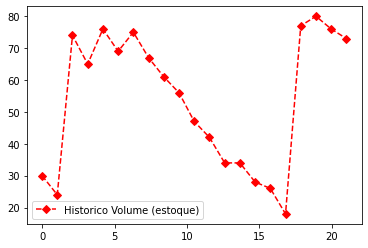

624.4859797355009


In [10]:
    # Definir codigo para execucao do programa
    ambiente_atuacao = Ambiente()
    Abastecimento = Agente(ambiente_atuacao)
    Abastecimento.executa_agente(20)

    Imprime().imprime_resultado(Abastecimento)
    print(Abastecimento.total_gasto)